### Importing libraries

In [1]:
import pandas as pd # library for data analysis
import numpy as np # numerical python
import matplotlib.pyplot as plt # data viz
import seaborn as sns # data viz

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
#!apt update
#!apt install ffmpeg libsm6 libxext6 -y

### Scraping BP dataset

Here, we are using only one source dataset taken from BP excel dataset, it has so many sheet that has enugh information to do research about the impact of renewable energy to Co2 emission

In [4]:
raw_bp = pd.ExcelFile('https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2020-all-data.xlsx')

BP dataset in the excel file has many sheet, we take the one that support our research question, here we choose Primary&nbsp;Energy&nbsp;Consumption, Renewables Consumption, and Carbon Dioxide Emissions

In [5]:
# checking all sheet in BP dataset
raw_bp.sheet_names

['Contents',
 'Primary Energy Consumption',
 'Primary Energy - Cons by fuel',
 'Primary Energy - Cons capita',
 'Carbon Dioxide Emissions',
 'Oil - Proved reserves',
 'Oil - Proved reserves history',
 'Oil Production - Barrels',
 'Oil Production - Tonnes',
 'Oil Production - Crude Conds',
 'Oil Production - NGLs',
 'Total Liquids - Consumption',
 'Oil Consumption - Barrels',
 'Oil Consumption - Tonnes',
 'Oil Consumption - EJ',
 'Oil - Regional Consumption ',
 'Oil - Spot crude prices',
 'Oil - Crude prices since 1861',
 'Oil - Refinery throughput',
 'Oil - Refining capacity',
 'Oil - Regional refining margins',
 'Oil - Trade movements',
 'Oil - Inter-area movements ',
 'Oil - Trade 2018 - 2019',
 'Gas - Proved reserves',
 'Gas - Proved reserves history ',
 'Gas Production - Bcm',
 'Gas Production - Bcf',
 'Gas Production - EJ',
 'Gas Consumption - Bcm',
 'Gas Consumption - Bcf',
 'Gas Consumption - EJ',
 'Gas - Prices ',
 'Gas - Inter-regional trade',
 'Gas - LNG imports',
 'Gas - LNG

### Energy Consumption

In [10]:
# Creating energy consumtion dataframe from BP dataset
energy_consumption = pd.read_excel(raw_bp, 'Primary Energy Consumption', header=2)

In [11]:
energy_consumption = energy_consumption.dropna(how='all') # drop rows that has all nan values
energy_consumption = energy_consumption.iloc[:-13,:-5] #Selecting rows
searchfor = ["Total","Other","Excludes"] 
energy_consumption = energy_consumption[~energy_consumption.Exajoules.str.contains('|'.join(searchfor))] # deleting rows that has values in 'searchfor'
energy_consumption.rename(columns={'Exajoules': 'country_name'}, inplace=True)

In [12]:
energy_consumption.head()  #Check if we have cleaned the data properly

,country_name,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Canada,4.924317,5.239095,5.480214,5.836056,6.185953,6.624581,6.831992,7.348642,7.857612,...,13.006501,13.605144,13.468474,13.881791,14.031964,13.993650,13.936678,14.109482,14.349534,14.214058
2,Mexico,1.050253,1.111572,1.132470,1.232997,1.353689,1.444834,1.519984,1.680466,1.812695,...,7.308951,7.660041,7.705558,7.738309,7.697182,7.688300,7.785419,7.895341,7.833322,7.720742
3,US,52.433795,55.383038,57.311776,60.799094,64.049612,66.215508,67.591944,71.064330,73.984875,...,92.972589,92.088362,89.687765,92.095480,93.054168,92.149004,92.017799,92.330525,95.602919,94.648804
6,Argentina,1.127632,1.165108,1.199725,1.241234,1.283912,1.212762,1.288378,1.311442,1.367910,...,3.227137,3.289076,3.382872,3.524577,3.506861,3.585803,3.576195,3.566920,3.540866,3.462769
7,Brazil,0.969469,1.057605,1.095653,1.252840,1.367832,1.585817,1.734259,1.997880,2.382002,...,10.981271,11.482705,11.688261,12.130483,12.401466,12.233422,11.918520,12.063701,12.134312,12.403434


In [13]:
energy_consumption_tr = energy_consumption.transpose() #transpose dataframe
new_header = energy_consumption_tr.iloc[0] #grab the first row for the header
energy_consumption_tr = energy_consumption_tr[1:] #take the data less the header row
energy_consumption_tr.columns = new_header #set the header row as the df header

# insert year column
energy_consumption_tr.insert(loc = 0,
                     column = 'year',
                     value = energy_consumption_tr.index)

energy_consumption_tr.reset_index(drop=True, inplace=True) # reset index
energy_consumption_tr.rename_axis(None, axis=1, inplace=True) # remove index name

In [18]:
# converting type in selected column/s
energy_consumption_tr['year'] = energy_consumption_tr['year'].astype(int)
energy_consumption_tr[energy_consumption_tr.columns[1:len(energy_consumption_tr.columns)]] = energy_consumption_tr[energy_consumption_tr.columns[1:len(energy_consumption_tr.columns)]].astype(float)

In [19]:
# showing 5 first dataset
energy_consumption_tr.head()

,year,Canada,Mexico,US,Argentina,Brazil,Chile,Colombia,Ecuador,Peru,...,Malaysia,New Zealand,Pakistan,Philippines,Singapore,South Korea,Sri Lanka,Taiwan,Thailand,Vietnam
0,1965,4.924317,1.050253,52.433795,1.127632,0.969469,0.260339,0.317745,0.031004,0.201675,...,0.104124,0.300031,0.294591,0.196229,0.172397,0.268883,0.023394,0.251619,0.110001,0.105819
1,1966,5.239095,1.111572,55.383038,1.165108,1.057605,0.279121,0.346224,0.032621,0.245395,...,0.121500,0.318714,0.296810,0.212103,0.197077,0.326130,0.024210,0.269637,0.131051,0.185083
2,1967,5.480214,1.132470,57.311776,1.199725,1.095653,0.284560,0.368583,0.035292,0.249737,...,0.122825,0.321344,0.328511,0.238249,0.236722,0.374809,0.024810,0.294464,0.149160,0.255110
3,1968,5.836056,1.232997,60.799094,1.241234,1.252840,0.283866,0.388302,0.041700,0.254294,...,0.125198,0.328637,0.372853,0.269161,0.294244,0.429671,0.025945,0.337735,0.191592,0.264528
4,1969,6.185953,1.353689,64.049612,1.283912,1.367832,0.305712,0.395002,0.044295,0.256096,...,0.131137,0.334485,0.374545,0.288331,0.289147,0.518672,0.027186,0.354152,0.202633,0.312456


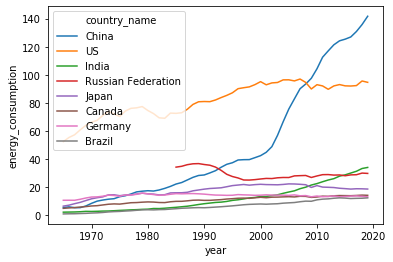

In [22]:
# Visualize 10 most highest co2 emission countries
energy_10 = energy_consumption.nlargest(8, 2019).melt(id_vars=['country_name'], var_name='year', value_name='energy_consumption')
sns.lineplot(x='year', y='energy_consumption', hue='country_name', data=energy_10)

### Carbon&nbsp;Dioxide&nbsp;Emissions

In [13]:
co2_emissions = pd.read_excel(raw_bp, 'Carbon Dioxide Emissions', header=2)
co2_emissions = co2_emissions.dropna(how='all')
co2_emissions = co2_emissions.iloc[:-13,:-5]
searchfor = ["Total","Other","Excludes"]
co2_emissions = co2_emissions[~co2_emissions['Million tonnes of carbon dioxide'].str.contains('|'.join(searchfor))]
co2_emissions.rename(columns={'Million tonnes of carbon dioxide': 'country_name'}, inplace=True)

In [14]:
co2_emissions.head()

,country_name,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Canada,260.332557,271.698929,285.537480,308.284201,320.447741,344.908460,351.586651,367.977437,386.717056,...,530.094931,541.020754,526.312965,544.096067,553.458312,546.233373,537.777358,549.107572,565.635679,556.188552
2,Mexico,62.134189,65.056561,66.648353,72.171786,79.107628,84.173086,89.462540,99.668266,107.674113,...,442.611064,465.846905,473.972290,472.839136,459.630951,463.121335,468.791476,476.945856,466.575628,454.972919
3,US,3480.084706,3675.466374,3772.622833,3994.225972,4170.119294,4298.208775,4340.724935,4564.699478,4764.400900,...,5485.715925,5336.435925,5089.974540,5249.595898,5254.565096,5141.406746,5042.431426,4983.869718,5116.785715,4964.693088
6,Argentina,77.341494,79.579541,81.846331,84.239573,86.902914,80.535084,85.254058,86.741981,89.802171,...,166.000124,168.746975,175.268259,182.764622,182.745499,186.021818,185.762130,182.807827,180.394930,174.877271
7,Brazil,51.522434,56.166435,58.011587,68.146806,74.257687,83.880674,92.171161,103.544446,123.609842,...,398.324213,423.761618,442.858031,482.871255,503.779772,487.040178,450.367978,457.229289,442.250684,441.299916


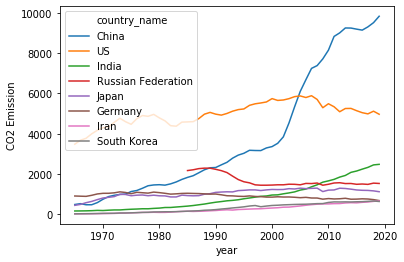

In [15]:
# Visualize 10 most highest co2 emission countries
co2_emissions_10 = co2_emissions.nlargest(8, 2019).melt(id_vars=['country_name'], var_name='year', value_name='CO2 Emission')
sns.lineplot(x='year', y='CO2 Emission', hue='country_name', data=co2_emissions_10)

In [16]:
co2_emissions_tr = co2_emissions.transpose() # transpose dataframe
new_header = co2_emissions_tr.iloc[0] #grab the first row for the header
co2_emissions_tr = co2_emissions_tr[1:] #take the data less the header row
co2_emissions_tr.columns = new_header #set the header row as the df header

# insert year column
co2_emissions_tr.insert(loc = 0,
                     column = 'year',
                     value = co2_emissions_tr.index)

co2_emissions_tr.reset_index(drop=True, inplace=True) # reset index
co2_emissions_tr.rename_axis(None, axis=1, inplace=True) # remove index name

In [17]:
# converting type in selected column/s
co2_emissions_tr['year'] = co2_emissions_tr['year'].astype(int)
co2_emissions_tr[co2_emissions_tr.columns[1:len(co2_emissions_tr.columns)]] = co2_emissions_tr[co2_emissions_tr.columns[1:len(co2_emissions_tr.columns)]].astype(float)

In [18]:
co2_emissions_tr.head()

,year,Canada,Mexico,US,Argentina,Brazil,Chile,Colombia,Ecuador,Peru,...,Malaysia,New Zealand,Pakistan,Philippines,Singapore,South Korea,Sri Lanka,Taiwan,Thailand,Vietnam
0,1965,260.332557,62.134189,3480.084706,77.341494,51.522434,16.704365,21.308531,2.068513,12.529142,...,7.016516,15.047212,19.505005,13.209440,13.092581,24.871266,1.455060,18.847770,7.366886,8.226465
1,1966,271.698929,65.056561,3675.466374,79.579541,56.166435,17.923391,23.052587,2.150559,15.395373,...,8.180897,15.795854,19.302632,14.388342,14.966980,29.610826,1.490169,20.038510,8.743907,13.943997
2,1967,285.537480,66.648353,3772.622833,81.846331,58.011587,18.252535,24.368449,2.312434,15.488571,...,8.290094,15.733801,21.051776,16.168303,18.022107,32.781891,1.526254,21.790885,9.900674,19.045888
3,1968,308.284201,72.171786,3994.225972,84.239573,68.146806,18.728529,25.214098,2.763361,15.669609,...,8.393498,15.670935,23.812020,18.378439,22.434620,36.303378,1.562765,23.868390,12.985647,19.795274
4,1969,320.447741,79.107628,4170.119294,86.902914,74.257687,19.850407,25.320421,2.931987,15.653769,...,8.666952,16.198284,23.219234,19.712486,22.039571,42.484118,1.598968,25.229664,14.063613,23.276365


### Renewable Consumption

In [19]:
renew_consumption = pd.read_excel(raw_bp, 'Renewables Consumption - EJ', header=2)

In [20]:
renew_consumption = renew_consumption.dropna(how='all')
renew_consumption = renew_consumption.iloc[:-11,:-5]
searchfor = ["Total","Other","Excludes"]
renew_consumption.rename(columns={'Exajoules (input-equivalent)': 'country_name'}, inplace=True)
renew_consumption = renew_consumption[~renew_consumption['country_name'].str.contains('|'.join(searchfor))]

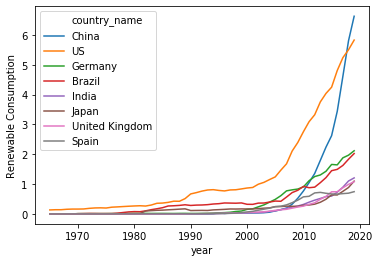

In [21]:
renew_consumption_10 = renew_consumption.nlargest(8, 2019).melt(id_vars=['country_name'], var_name='year', value_name='Renewable Consumption')
sns.lineplot(x='year', y='Renewable Consumption', hue='country_name', data=renew_consumption_10)

In [22]:
renew_consumption_tr = renew_consumption.transpose() # transpose dataframe
new_header = renew_consumption_tr.iloc[0] #grab the first row for the header
renew_consumption_tr = renew_consumption_tr[1:] #take the data less the header row
renew_consumption_tr.columns = new_header #set the header row as the df header
# insert year column
renew_consumption_tr.insert(loc = 0,
                     column = 'year',
                     value = renew_consumption_tr.index)
renew_consumption_tr.reset_index(drop=True, inplace=True) # reset index
renew_consumption_tr.rename_axis(None, axis=1, inplace=True) # remove index name

In [23]:
# converting type in selected column/s
renew_consumption_tr['year'] = renew_consumption_tr['year'].astype(int)
renew_consumption_tr[renew_consumption_tr.columns[1:len(renew_consumption_tr.columns)]] = renew_consumption_tr[renew_consumption_tr.columns[1:len(renew_consumption_tr.columns)]].astype(float)

In [24]:
renew_consumption_tr.head()

,year,Canada,Mexico,US,Argentina,Brazil,Chile,Colombia,Ecuador,Peru,...,Malaysia,New Zealand,Pakistan,Philippines,Singapore,South Korea,Sri Lanka,Taiwan,Thailand,Vietnam
0,1965,0.0,0.0,0.133322,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1966,0.0,0.0,0.140620,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1967,0.0,0.0,0.140736,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1968,0.0,0.0,0.155460,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1969,0.0,0.0,0.162271,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Country Data

In [25]:
# Create year dataframe
df = pd.DataFrame(data = np.arange(1965,2020,1),columns=['year'])

Create dataframe for single country

In [26]:
# Function to create country dataframe
def country_data(country):
    df['energy_consumption'] = df['year'].map(energy_consumption_tr.set_index('year')[country])
    df['co2_emissions'] = df['year'].map(co2_emissions_tr.set_index('year')[country])
    df['renew_consumption'] = df['year'].map(renew_consumption_tr.set_index('year')[country])
    return df

In [27]:
# US dataframe, can be change into any other countries.
US_data = country_data('US')

In [28]:
# Visualize US data
US_data.head()

,year,energy_consumption,co2_emissions,renew_consumption
0,1965,52.433795,3480.084706,0.133322
1,1966,55.383038,3675.466374,0.140620
2,1967,57.311776,3772.622833,0.140736
3,1968,60.799094,3994.225972,0.155460
4,1969,64.049612,4170.119294,0.162271


In [29]:
# scaling the values
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler()
US_data[['energy_consumption', 'co2_emissions', 'renew_consumption']] = pd.DataFrame(sclr.fit_transform(US_data[['energy_consumption', 'co2_emissions', 'renew_consumption']].values), columns=['energy_consumption', 'co2_emissions', 'renew_consumption'], index=US_data.index)

In [30]:
US_data = US_data.set_index('year')

In [31]:
print(US_data.corr()['co2_emissions'])

energy_consumption    0.947309
co2_emissions         1.000000
renew_consumption     0.346190
Name: co2_emissions, dtype: float64


Text(0.5, 1, 'Correlation Matrix Between All Feature')

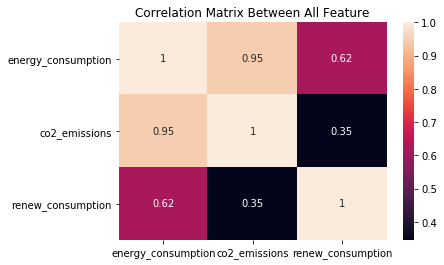

In [32]:
sns.heatmap(US_data.corr(), annot = True)
plt.title('Correlation Matrix Between All Feature')

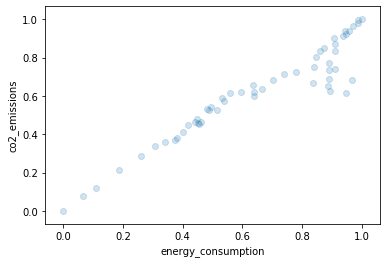

In [33]:
sns.regplot(y='co2_emissions', x='energy_consumption', data=US_data, fit_reg = False, scatter_kws={"alpha": 0.2})

Relationship between co2_emissions and energy_consumtion is positively linear.

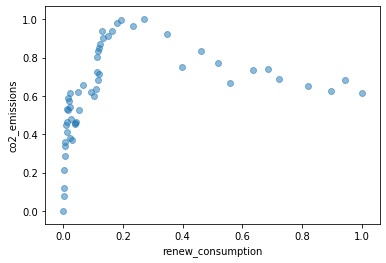

In [34]:
sns.regplot(y='co2_emissions', x='renew_consumption', data=US_data, fit_reg = False, scatter_kws={"alpha": 0.5})

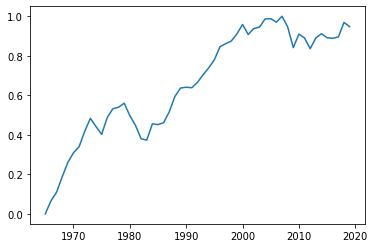

In [35]:
sns.lineplot(data=US_data['energy_consumption'])

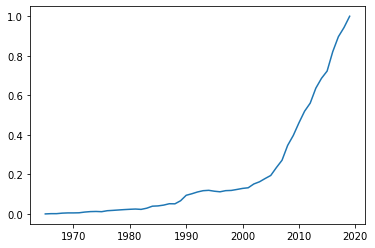

In [36]:
sns.lineplot(data=US_data['renew_consumption'])

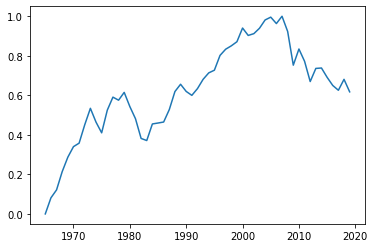

In [37]:
sns.lineplot(data=US_data['co2_emissions'])

Pearson’s correlation is the test statistics that measures the statistical relationship, or association, between two continuous variables. 0.3 shows that this is a weak uphill (positive) linear relationship.

In [38]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(US_data['co2_emissions'], US_data['renew_consumption'])
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.346


In [39]:
# calculate spearman's correlation
from scipy.stats import spearmanr

corr, _ = spearmanr(US_data['co2_emissions'], US_data['renew_consumption'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.790


### Linear regression using Statsmodels on Energy Data

Statsmodels&nbsp;is “a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.” (from the documentation)

In [40]:
US_data.head()

,energy_consumption,co2_emissions,renew_consumption
year,,,
1965,0.000000,0.000000,0.000000
1966,0.066182,0.081271,0.001281
1967,0.109463,0.121685,0.001302
1968,0.187720,0.213863,0.003887
1969,0.260663,0.287028,0.005083


In [41]:
import statsmodels.api as sm # import statsmodels 

X = US_data["energy_consumption"] #input variables (or independent variables)
y = US_data["co2_emissions"] #output/dependent variable
#X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          co2_emissions   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              3559.
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                    5.59e-51
Time:                        17:28:46   Log-Likelihood:                          60.041
No. Observations:                  55   AIC:                                     -118.1
Df Residuals:                      54   BIC:                                     -116.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
energy_consumption     0.9285      0.016     59.661      0.000       0.897       0.960
==============================================================================
Omnibus:                       29.176   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.796
Skew:                          -1.856   Prob(JB):                     2.54e-11
Kurtosis:                       5.741   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The&nbsp;energy_consumption has statistically significant p-value; there is a 95% confidence intervals for the&nbsp;energy_consumption  (meaning we predict at a 95% percent confidence that the value of&nbsp;energy_consumption is between&nbsp;0.897 to 0.960).

In [42]:
# Using the two features
X = US_data[["energy_consumption","renew_consumption"]] #input variables (or independent variables)
y = US_data["co2_emissions"] #output/dependent variable

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          co2_emissions   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.174e+04
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                    5.85e-78
Time:                        17:28:46   Log-Likelihood:                          128.99
No. Observations:                  55   AIC:                                     -254.0
Df Residuals:                      53   BIC:                                     -250.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
energy_consumption     1.0498      0.007    156.959      0.000       1.036       1.063
renew_consumption     -0.3439      0.014    -24.442      0.000      -0.372      -0.316
==============================================================================
Omnibus:                        0.839   Durbin-Watson:                   0.556
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.934
Skew:                          -0.239   Prob(JB):                        0.627
Kurtosis:                       2.577   Cond. No.                         3.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see here that this model has a much higher R-squared value 0.999, meaning that this model explains 99.9% of the variance in our dependent variable. Everytime we add variables to a regression model, R² will be higher, but this number shows almost a perfect number of R². We can see that both&nbsp;"energy_consumption" and "renew_consumption" are statistically significant in predicting (or estimating) the median of co2 emissons. So, combination between "energy_consumption" and "renew_consumption" are giving high impact on reducing the co2 emissions.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f620d388-a26c-4d64-9881-8c93b73bc0b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>